In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from DataCleaning import open_and_manage
url = "../quick_clean.csv"
df = open_and_manage(url)

In [40]:
# pd.options.display.max_columns = None
df.tail()

,id,type,subtype,price,zip_code,cuisine_type,constructionYear,condition,heatingType,room_number,...,subtype_mansion,subtype_mixed use building,subtype_other property,subtype_penthouse,subtype_service flat,subtype_town house,subtype_triplex,subtype_villa,type_apartment,type_house
19850,8128634,house,house,435200.0,2550,hyper equipped,2019.0,as new,gas,3.0,...,0,0,0,0,0,0,0,0,0,1
19851,8907618,house,house,420000.0,5640,No infos,NaN,as new,fueloil,0.0,...,0,0,0,0,0,0,0,0,0,1
19852,8954484,house,mansion,450000.0,2018,No infos,NaN,as new,fueloil,6.0,...,1,0,0,0,0,0,0,0,0,1
19853,9001418,house,apartment block,450000.0,9500,installed,NaN,to be done up,gas,5.0,...,0,0,0,0,0,0,0,0,0,1
19854,8907992,house,house,420000.0,5621,No infos,NaN,to be done up,fueloil,0.0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df.shape

(19855, 72)

# Are there any outliers? If yes, which ones and why?

### Rooms

In [42]:
room_outliers = df[np.abs(df.room_number-df.room_number.mean()) > (3*df.room_number.std())]
room_outliers[["id","room_number","square_metres"]].sort_values(by="room_number", ascending=False).head()

,id,room_number,square_metres
6283,8715085,204.0,204
8103,8919065,204.0,204
7814,8818453,204.0,204
17491,8784255,165.0,165
18089,8951414,100.0,8800


Text(0.5, 1.0, 'Distribution of room number')

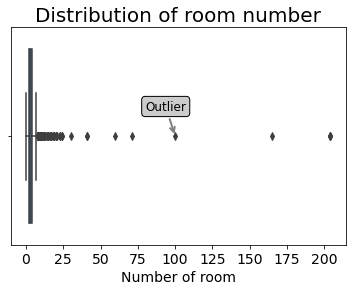

In [43]:
# box plot of the variable room_number
ax = sns.boxplot(df.room_number)

# notation indicating an outlier
ax.annotate('Outlier', xy=(100,0), xytext=(80,-0.12), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Number of room', fontsize=14)
plt.title('Distribution of room number', fontsize=20)

### Parkings

In [44]:
parking_in_outliers = df[np.abs(df.nbr_parking_indoor-df.nbr_parking_indoor.mean()) > (3*df.nbr_parking_indoor.std())]
parking_in_outliers[["id","nbr_parking_indoor","square_metres"]].head()

,id,nbr_parking_indoor,square_metres
3226,8944138,35000.0,106


Text(0.5, 1.0, 'Distribution of indoor parking')

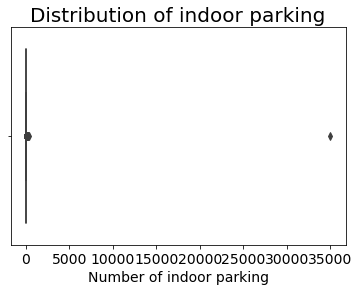

In [45]:
ax = sns.boxplot(df.nbr_parking_indoor)
plt.xticks(fontsize=14)
plt.xlabel('Number of indoor parking', fontsize=14)
plt.title('Distribution of indoor parking', fontsize=20)

In [46]:
parking_out_outliers = df[np.abs(df.nbr_parking_outdoor-df.nbr_parking_outdoor.mean()) > (3*df.nbr_parking_outdoor.std())]
parking_out_outliers[["id","nbr_parking_outdoor","square_metres"]].sort_values(by="nbr_parking_outdoor", ascending=False).head(10)

,id,nbr_parking_outdoor,square_metres
678,8372213,250.0,93
470,8773002,250.0,69
520,9007599,250.0,83
356,8318891,202.0,84
193,8972719,109.0,69
77,9007296,100.0,118
5460,9027328,100.0,65
5053,8978908,100.0,90
14981,8869798,100.0,850
15958,8489907,100.0,655


Text(0.5, 1.0, 'Distribution of outdoor parking')

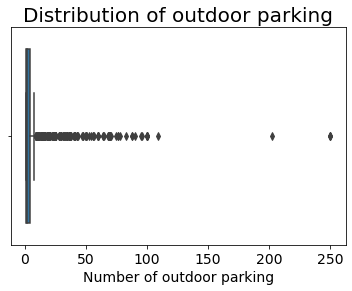

In [47]:
ax = sns.boxplot(df.nbr_parking_outdoor)
plt.xticks(fontsize=14)
plt.xlabel('Number of outdoor parking', fontsize=14)
plt.title('Distribution of outdoor parking', fontsize=20)

### Price by m²

In [48]:
price_outliers = df[np.abs(df.price_by_m2-df.price_by_m2.mean()) > (3*df.price_by_m2.std())]
price_outliers[["id","price_by_m2","square_metres"]].sort_values(by="price_by_m2", ascending=False).head(10)

,id,price_by_m2,square_metres
8210,8897106,1.375000e+06,4
18860,8826655,1.100000e+06,3
741,8403485,1.045000e+06,1
14367,9021889,1.000000e+06,4
4754,8859942,9.750000e+05,1
19652,8859366,9.250000e+05,2
8213,9009029,8.350000e+05,1
19661,8332018,7.375000e+05,4
17203,8700108,7.071429e+05,7
16483,8187164,7.000000e+05,5


Text(0.5, 1.0, 'Distribution of outdoor parking')

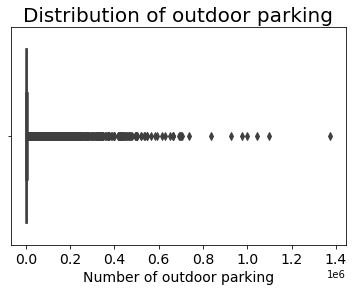

In [49]:
ax = sns.boxplot(df.price_by_m2)
plt.xticks(fontsize=14)
plt.xlabel('Number of outdoor parking', fontsize=14)
plt.title('Distribution of outdoor parking', fontsize=20)

In [50]:
print(f"Number of room outliers : {len(room_outliers)}")
print(f"Number of indoor parking outliers : {len(parking_in_outliers)}")
print(f"Number of outdoor parking outliers : {len(parking_out_outliers)}")
print(f"Number of outdoor parking outliers : {len(price_outliers)}")

Number of room outliers : 44
Number of indoor parking outliers : 1
Number of outdoor parking outliers : 85
Number of outdoor parking outliers : 360


# Which variables would you delete and why ?

### Rooms

In [51]:
# Delete rows when the number of room is equals or greater than square meters
df = df[df.room_number < df.square_metres]
df[["id","room_number","square_metres","price"]].sort_values(by="room_number", ascending=False)

,id,room_number,square_metres,price
18089,8951414,100.0,8800,15000000.0
15436,8820666,60.0,8521,1100000.0
10481,7701432,41.0,2049,5200000.0
10482,7701433,41.0,2049,5200000.0
11243,9029547,30.0,415,550000.0
...,...,...,...,...
3810,8997835,0.0,41,170000.0
18359,9021045,0.0,296,120000.0
18357,8912294,0.0,93,139000.0
3788,8960382,0.0,40,99000.0


### Parkings

In [52]:
# Delete rows when the number of parking indoor is equals or greater than square meters
df = df[(df.nbr_parking_indoor < df.square_metres) | (df.nbr_parking_indoor.isna())]
df[["id","nbr_parking_indoor","square_metres","price"]].sort_values(by="nbr_parking_indoor", ascending=False)

,id,nbr_parking_indoor,square_metres,price
1521,8956263,126.0,238,775000.0
4459,8956261,126.0,164,625000.0
513,9019385,100.0,110,259000.0
561,8479154,95.0,96,366250.0
5700,8411268,70.0,182,695000.0
...,...,...,...,...
19847,8822100,NaN,168,398050.0
19850,8128634,NaN,140,435200.0
19851,8907618,NaN,1000,420000.0
19852,8954484,NaN,253,450000.0


In [53]:
# Delete rows when the number of parking outdoor is equals or greater than square meters
df = df[(df.nbr_parking_outdoor < df.square_metres) | (df.nbr_parking_outdoor.isna())]
df[["id","nbr_parking_outdoor","square_metres","price"]].sort_values(by="nbr_parking_outdoor", ascending=False)

,id,nbr_parking_outdoor,square_metres,price
77,9007296,100.0,118,318000.0
15958,8489907,100.0,655,750000.0
14981,8869798,100.0,850,2900000.0
561,8479154,95.0,96,366250.0
6614,8874517,76.0,86,249500.0
...,...,...,...,...
19847,8822100,NaN,168,398050.0
19850,8128634,NaN,140,435200.0
19851,8907618,NaN,1000,420000.0
19852,8954484,NaN,253,450000.0


### Price by m²

In [54]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'price_by_m2'.
df = df[np.abs(df.price_by_m2-df.price_by_m2.mean()) <= (3*df.price_by_m2.std())]

# In your opinion, which 5 variables are the most important and why?

### A discuter  
prix/m2  
city+region  
condition  

# What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)

In [55]:
df.columns

Index(['id', 'type', 'subtype', 'price', 'zip_code', 'cuisine_type',
       'constructionYear', 'condition', 'heatingType', 'room_number',
       'atticExists', 'basementExists', 'hasSwimmingPool',
       'nbr_parking_indoor', 'nbr_parking_outdoor', 'company_name',
       'square_metres', 'city', 'region', 'price_by_m2', 'region_Bruxelles',
       'region_Flanders', 'region_Wallonia', 'heating_carbon',
       'heating_electric', 'heating_fueloil', 'heating_gas', 'heating_pellet',
       'heating_solar', 'heating_wood', 'condition_as new', 'condition_good',
       'condition_just renovated', 'condition_to be done up',
       'condition_to renovate', 'condition_to restore', 'cuisine_No infos',
       'cuisine_hyper equipped', 'cuisine_installed', 'cuisine_not installed',
       'cuisine_semi equipped', 'cuisine_usa hyper equipped',
       'cuisine_usa installed', 'cuisine_usa semi equipped',
       'cuisine_usa uninstalled', 'subtype_apartment',
       'subtype_apartment block', 'subtype

Text(0, 0.5, 'Price')

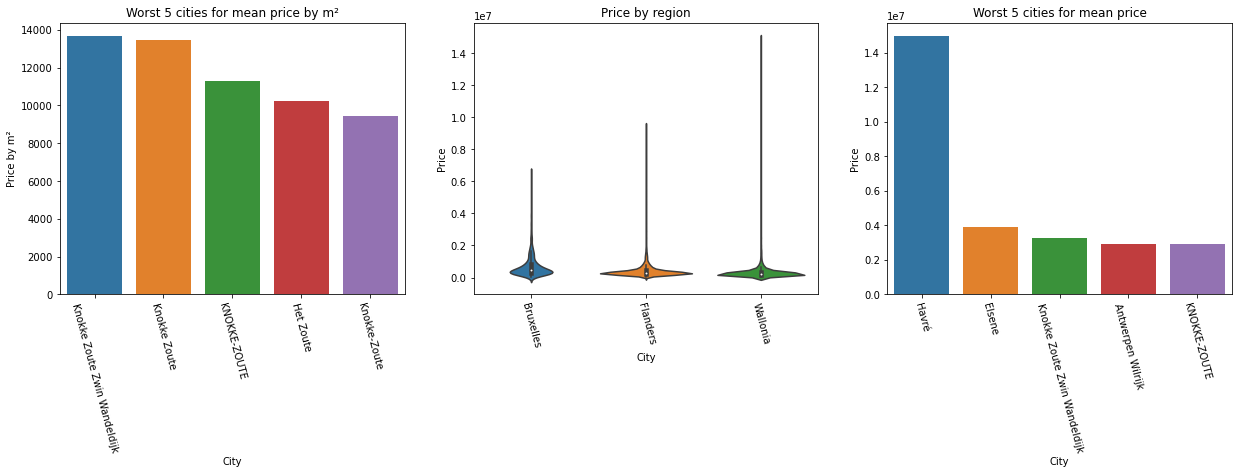

In [56]:
cities = df.groupby(by="city")
cities = cities["price_by_m2"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price_by_m2", ascending=False, inplace=True)
plt.figure(1, figsize=(21,5))
plt.subplot(131)
sns.barplot(x="city", y="price_by_m2", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Worst 5 cities for mean price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")


cities = df[["city","price","region"]]
plt.subplot(132)
sns.violinplot(x="region", y="price", data=cities)
plt.xticks(rotation=-75)
plt.title("Price by region")
plt.xlabel("City")
plt.ylabel("Price")

cities = df.groupby(by="city")
cities = cities["price"].agg(np.mean)
cities = pd.DataFrame(cities)
cities["city"] = cities.index 
cities.sort_values(by="price", ascending=False, inplace=True)
plt.subplot(133)
sns.barplot(x="city", y="price", data=cities.head())
plt.xticks(rotation=-75)
plt.title("Worst 5 cities for mean price")
plt.xlabel("City")
plt.ylabel("Price")

In [57]:
cities

,price,city
city,,
Havré,1.500000e+07,Havré
Elsene,3.900000e+06,Elsene
Knokke Zoute Zwin Wandeldijk,3.245000e+06,Knokke Zoute Zwin Wandeldijk
Antwerpen Wilrijk,2.950000e+06,Antwerpen Wilrijk
KNOKKE-ZOUTE,2.896667e+06,KNOKKE-ZOUTE
...,...,...
Wasmes,3.500000e+04,Wasmes
Tavier,2.500000e+04,Tavier
Strée,2.000000e+04,Strée


In [58]:
df[["id","city","price","square_metres","price_by_m2"]].sort_values(by="price_by_m2", ascending=False)

,id,city,price,square_metres,price_by_m2
6053,8727317,Knokke,1745000.0,125,13960.000000
5409,8850838,Knokke-Heist,1630000.0,117,13931.623932
4041,8023038,Knokke,1630000.0,117,13931.623932
2268,8859199,Knokke,1295000.0,93,13924.731183
1160,9017333,Knokke-Heist,1295000.0,93,13924.731183
...,...,...,...,...,...
19421,8723657,Ostende,219000.0,2019,108.469539
10937,8598139,Modave,25000.0,270,92.592593
15253,8796340,LONZEE,10000.0,110,90.909091
13625,9015874,Gedinne,40000.0,462,86.580087


In [59]:
# g = sns.catplot(x='city', 
#                    y='price', 
#                    data=df, 
#                    hue='region',  # Color by stage
#                    col='region',  # Separate by stage
#                    kind='swarm') # Swarmplot
 
# # Rotate x-axis labels
# g.set_xticklabels(rotation=-45)